# HR Analytics - Promotion Prediction

### 📌 Problem Statement:
Your client is a large MNC and they have 9 broad verticals across the organization. One of the problems your client is facing is identifying the right people for promotion (only for manager position and below) and preparing them in time.

Currently, the process they follow is:

1. They first identify a set of employees based on recommendations/past performance.
2. Selected employees go through a separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical.
3. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 80% are considered), etc., an employee gets promoted.

However, the final promotions are only announced after the evaluation, which leads to delays in transitioning to their new roles.

### 🎯 Goal:
To identify **eligible candidates** for promotion at a specific checkpoint to **expedite** the promotion cycle.

You are provided with multiple attributes around the employee’s **past and current performance** along with demographics. The task is to **predict whether a potential promotee at the checkpoint will be promoted or not**.

---

### 📊 Dataset Description:

| Variable              | Definition |
|-----------------------|------------|
| `employee_id`         | Unique ID for employee |
| `department`          | Department of employee |
| `region`              | Region of employment (unordered) |
| `education`           | Education Level |
| `gender`              | Gender of Employee |
| `recruitment_channel` | Channel of recruitment for employee |
| `no_of_trainings`     | No. of other trainings completed in previous year |
| `age`                 | Age of Employee |
| `previous_year_rating` | Employee Rating for the previous year |
| `length_of_service`   | Length of service in years |
| `KPIs_met >80%`       | 1 if KPIs > 80%, else 0 |
| `awards_won?`         | 1 if awards won in previous year, else 0 |
| `avg_training_score`  | Average score in current training evaluations |
| `is_promoted`         | **Target variable** — Recommended for promotion (1 if yes, 0 if no) |




# Importing Required Libraries

In [110]:
import pandas as pd # Used for data manuplation and analysis
import numpy as np # for numerical computation and array operations
import matplotlib.pyplot as plt # for data visualsation
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import pickle  
import joblib  # load and dump the model 
# encoding
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split   # splitting into train and test by this model selection
from imblearn.over_sampling import SMOTE               # resampling technique for balancing the data
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix  # metrics
# Models
# Importing various classification algorithms for model comparison and evaluation
from sklearn.linear_model import LogisticRegression #linear model
from sklearn.neighbors import KNeighborsClassifier  #cluster model
from sklearn.svm import SVC                         # support vector machine
from sklearn.naive_bayes import GaussianNB 
#Tree Based models
from sklearn.tree import DecisionTreeClassifier  #tree model decision tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier #ensemble models

#ROC Curve
from sklearn.metrics import roc_curve, auc

#cross validation 
from sklearn.model_selection import StratifiedKFold,cross_validate,cross_val_score

# Loading The Datasets

In [167]:
# Load the training dataset
train_df=pd.read_csv(r'train.csv')
# load the test dataset
test_df=pd.read_csv(r'test.csv')

In [168]:
# No-of rows and columns of each dataset
print(f"shape of the train dataset :{train_df.shape}")
print(f"shape of the test dataset :{test_df.shape}")

shape of the train dataset :(54808, 14)
shape of the test dataset :(23490, 13)


- The Total rows and columns in train data is  54808 and  14
- The total rows and columns in test data is 23490 and 13

In [169]:
train_df[train_df['is_promoted']==1]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
66,77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,NaN,1,0,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54757,14502,Technology,region_7,Master's & above,m,other,1,54,4.0,7,0,0,81,1
54761,8278,Procurement,region_13,Bachelor's,f,sourcing,1,30,4.0,2,1,0,86,1
54792,994,Sales & Marketing,region_14,Bachelor's,m,other,1,59,3.0,11,0,0,65,1


### Display the first five rows of each data

In [113]:
print('top 5 rows of train data :')
train_df.head()

top 5 rows of train data :


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [114]:
print('data top 5 rows of test data :')
test_df.head()

data top 5 rows of test data :


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


### Summary of the dataframe

In [115]:
print('summary of train data :\n')
train_df.info()

summary of train data :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usa

- the train data has 5 object columns, 8 integer columns and 1 float column
- [Education, previous_year_rating] this columns has null values 

In [116]:
print('summary of the test data: \n')
test_df.info()

summary of the test data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


- the test data has 5 object columns, 7 integer columns and 1 float column
- [Education, previous_year_rating] this columns has null values  

### merging train and test data

### 📝 What is Happening Here?

We are combining `train_data` and `test_data` into one single dataset (`full_data`) to apply consistent preprocessing (like encoding, missing value treatment, scaling, etc.).

Once processing is complete, we will split it back into training and testing datasets.


In [117]:
train_test_df=pd.concat([train_df,test_df],axis=0)

In [118]:
train_test_df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0


- here train_test_df is combination of train and test
- here is_promoted columns has null values which is test. we didn't  fill that. here we are going to predict that from model

# Data Preprocessing

In [119]:
train_test_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 9.0+ MB


In [120]:
train_test_df.drop(['employee_id','region'],axis=1,inplace=True)

- Droping columns employee_id and region because this not useful for the prediction is_promoted or not

In [121]:
# no-of null values
print(f'data :\n{20*'*'}\n{train_test_df.isna().sum()}')

data :
********************
department                  0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64


- Null columns
- education : 3443
- previous_year_rating : 5936

### filling null values in to dataset

In [122]:
train_test_df.head(3)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0


In [123]:
train_df[train_df['is_promoted']==1]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
66,77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,NaN,1,0,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54757,14502,Technology,region_7,Master's & above,m,other,1,54,4.0,7,0,0,81,1
54761,8278,Procurement,region_13,Bachelor's,f,sourcing,1,30,4.0,2,1,0,86,1
54792,994,Sales & Marketing,region_14,Bachelor's,m,other,1,59,3.0,11,0,0,65,1


In [124]:
# unique values in education and previous year rating column
print(train_test_df['education'].value_counts())
train_test_df['previous_year_rating'].value_counts()

education
Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: count, dtype: int64


previous_year_rating
3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: count, dtype: int64

In [125]:
# filling the null values of education with mode value 
mode_edu=train_test_df['education'].mode()
print(f'mode of education :{mode_edu[0]}')
train_test_df['education'].fillna(mode_edu[0],inplace=True)
# filling the null values of previous year rating with 0
train_test_df['previous_year_rating'].fillna(0,inplace=True)

mode of education :Bachelor's


##### THe 'Education' contain some missing values (NaN)
-  since most of the employee have Bachelor's degree,
-  so we are filling missing values with Bachelors's,Because they might be Bachelor's degree
  

##### The 'previous_year_rating' column has some missing values.
- This can happen if the employee is a fresher or has no rating history.
- Since we can't be sure, we safely fill missing values with 0 

In [126]:
#  null values after fill the datset
train_test_df.isna().sum()

department                  0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [127]:
# renaming gender column values in train_test_df
train_test_df['gender']=train_test_df['gender'].map({'m':'Male','f':'Female'})

- Renaming the values in the gender column to make them more meaningful.
- m: Male
- f: Female

In [128]:
train_test_df.head(3)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,Female,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,Bachelor's,Male,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,Bachelor's,Male,sourcing,1,34,3.0,7,0,0,50,0.0


# Exploratory Data Analysis

In [129]:
# seperating categorical and numerical dataset
object_columns=train_test_df.select_dtypes(include='object').columns
print(f'Object columns are :{object_columns}')
num_columns=train_test_df.select_dtypes(include='number').columns
print(f'numeric columns are :{num_columns}')

Object columns are :Index(['department', 'education', 'gender', 'recruitment_channel'], dtype='object')
numeric columns are :Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')


- object columns are: ['department', 'education', 'gender', 'recruitment_channel'] 
- numerical columns are :['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
    'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']

## Univariant analysis

#### numerical continous_columns

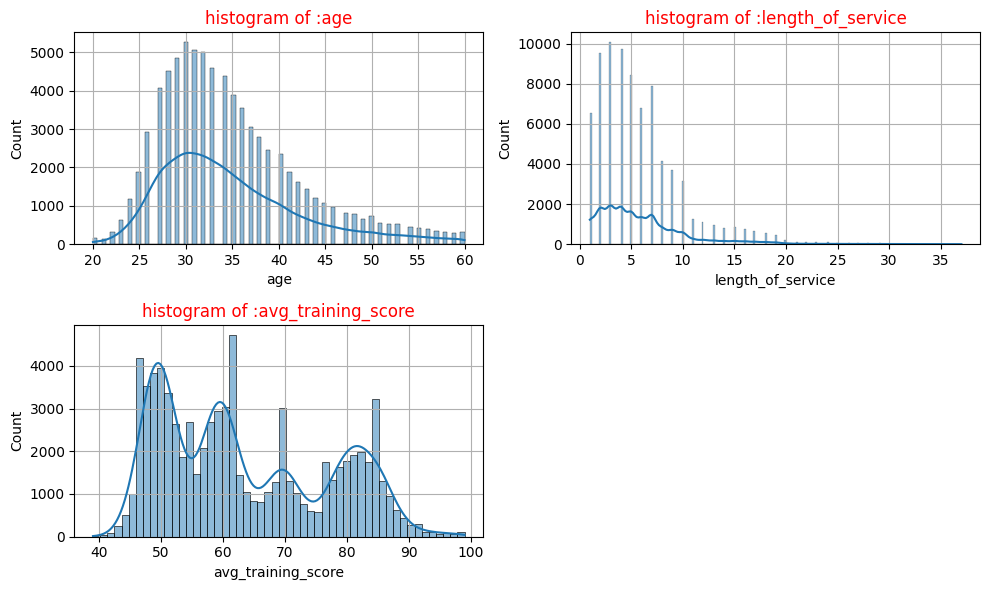

In [130]:
### histogram of the columns age,length_of_service and avg_training_score
cols=['age','length_of_service','avg_training_score']
plt.figure(figsize=(10,6))
for i,col in enumerate(cols,1):
    plt.subplot(2,2,i)
    sns.histplot(x=col,data=train_test_df,kde=True)
    plt.grid()
    plt.title(f'histogram of :{col}',color='red')
plt.tight_layout()

plt.show()

###### age:
- Most of the employee fall in the 27 to 40 years of age
- it indicate most young to mid-level peoples are ther in organisation
###### length of service: 
- most of the employees has length of service less than 10years
###### the average training score
- there is no perfect distribution of avg training score and it doesn't follow any pattern

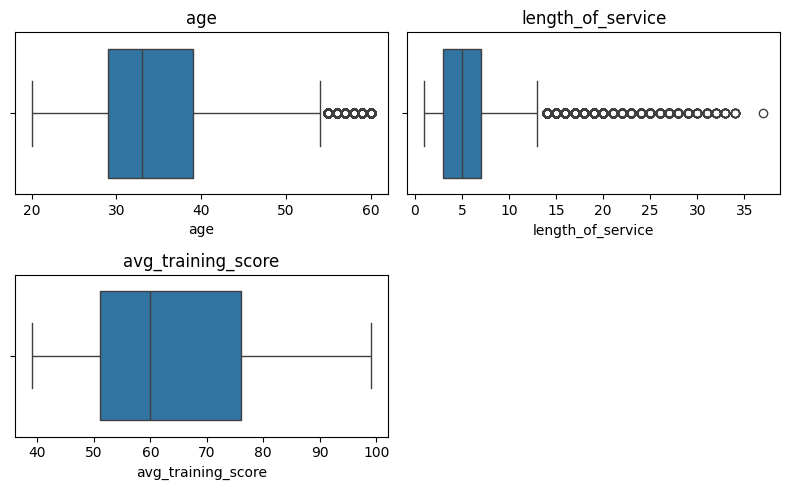

In [131]:
### box plot for the ['age','length_of_service','avg_training_score']
plt.figure(figsize=(8,5))
for i,col in enumerate(cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(x=col,data=train_test_df)
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

#### box plot
###### age
- age has some outliers because of the most of the employee are fall in 27 to 40 years of age
###### length_of_service 
- in the length of sevice has more outliers because the most of the employee are <10years of service
###### avg training score
- it is good column which is not have any outliers

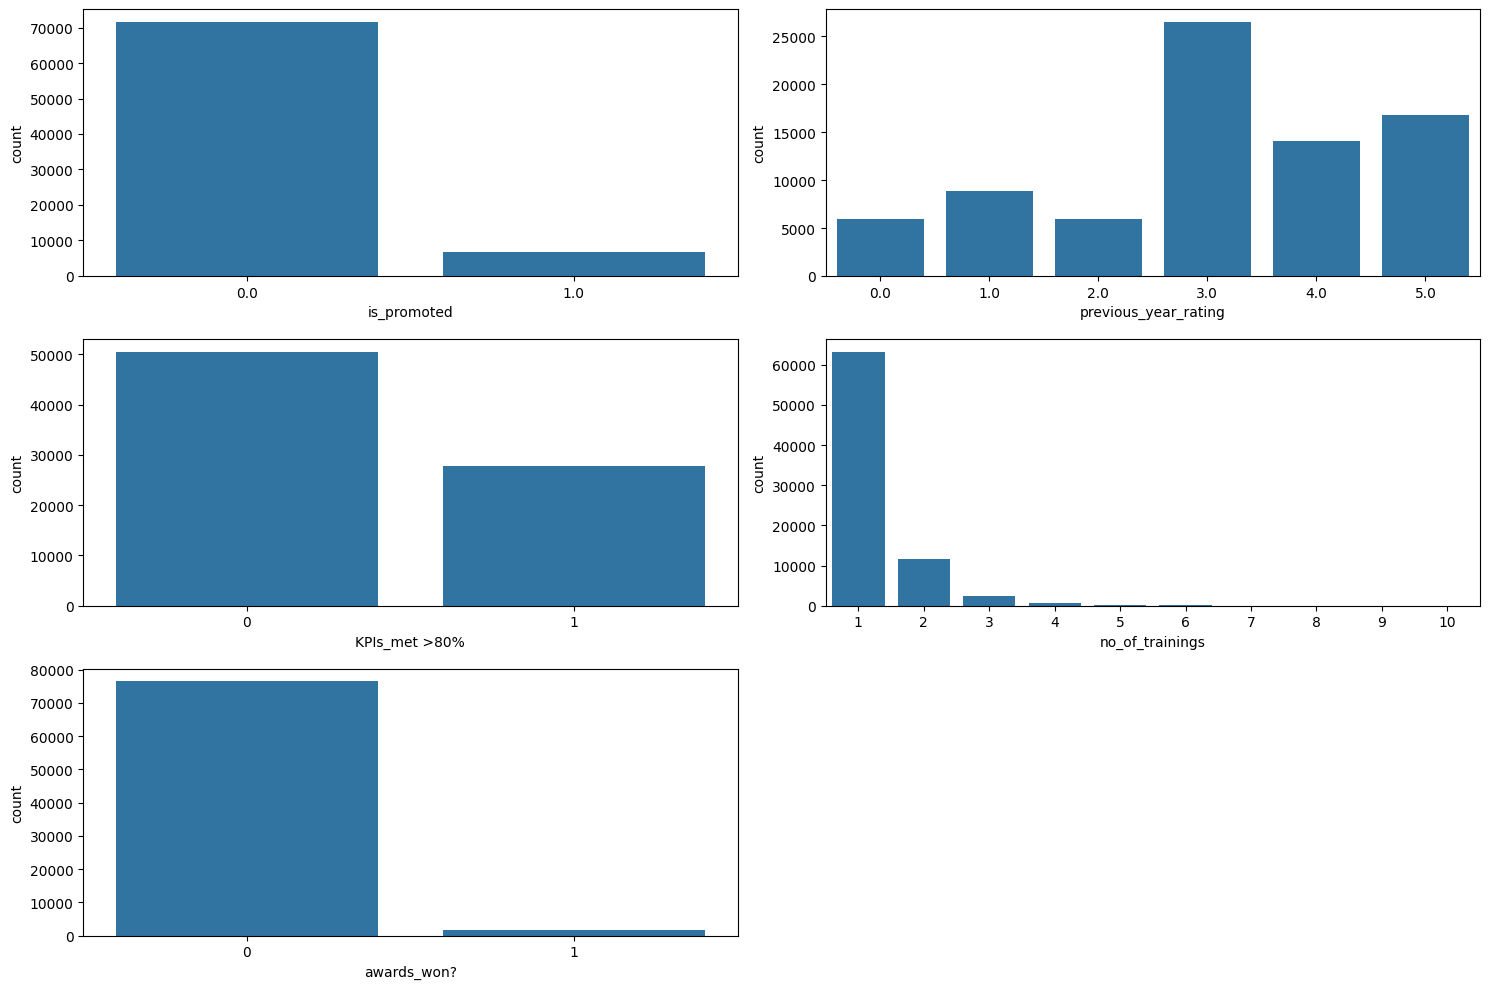

In [132]:
### count plot for the ['previous_year_rating','KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']
cols_=list(set(num_columns)-set(cols))

plt.figure(figsize=(15,10))
for i,col in enumerate(cols_,1):
    plt.subplot((len(cols_)+2)//2,2,i)
    sns.countplot(x=col,data=train_test_df)
plt.tight_layout()
plt.show()

##### KPI
- While a large portion of employees have a KPI score less than 80%, around 60% of employees have KPI greater than 80%, indicating strong performance among a significant group.
##### is promoted
- The majority of employees were not promoted.
##### no-of-traing 
- Most employees have taken training only once.
##### previous year rating
- most of the employee got 3 rating
-  4 and 5 rating employee also frequent
-  0,1,2 are less compare to other
##### awards won
- Very few employees have won awards.

#### countplot on object columns

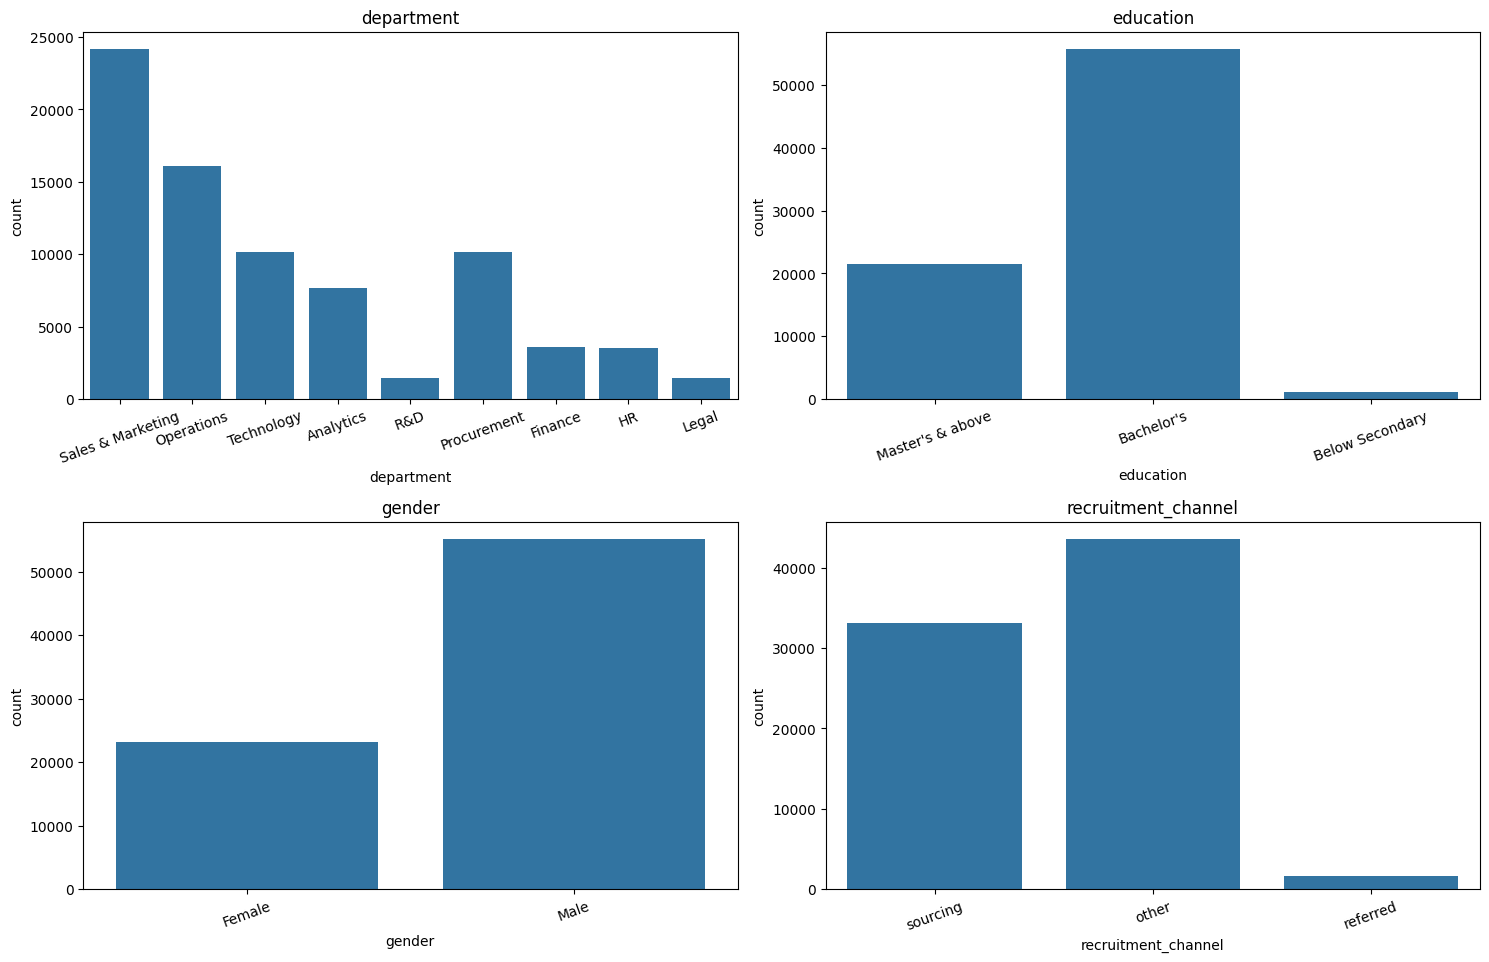

In [133]:
### barchar of the all object columns
plt.figure(figsize=(15,14))
for i,col in enumerate(object_columns,1):
    plt.subplot((len(object_columns)+2)//2,2,i)
    sns.countplot(x=col,data=train_test_df)
    plt.xticks(rotation=20)
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

##### department
- The majority of employees belong to the Sales & Marketing and Operations departments.
##### education
- most of the employee's has 'Batchelor's' degree
##### gender
- her most of the 'employees' are 'male's'
##### recruitment channel
- other 'recruitment' is more than common recrutment channel 'sourcing' and 'referred'

## Bivariant Analysis

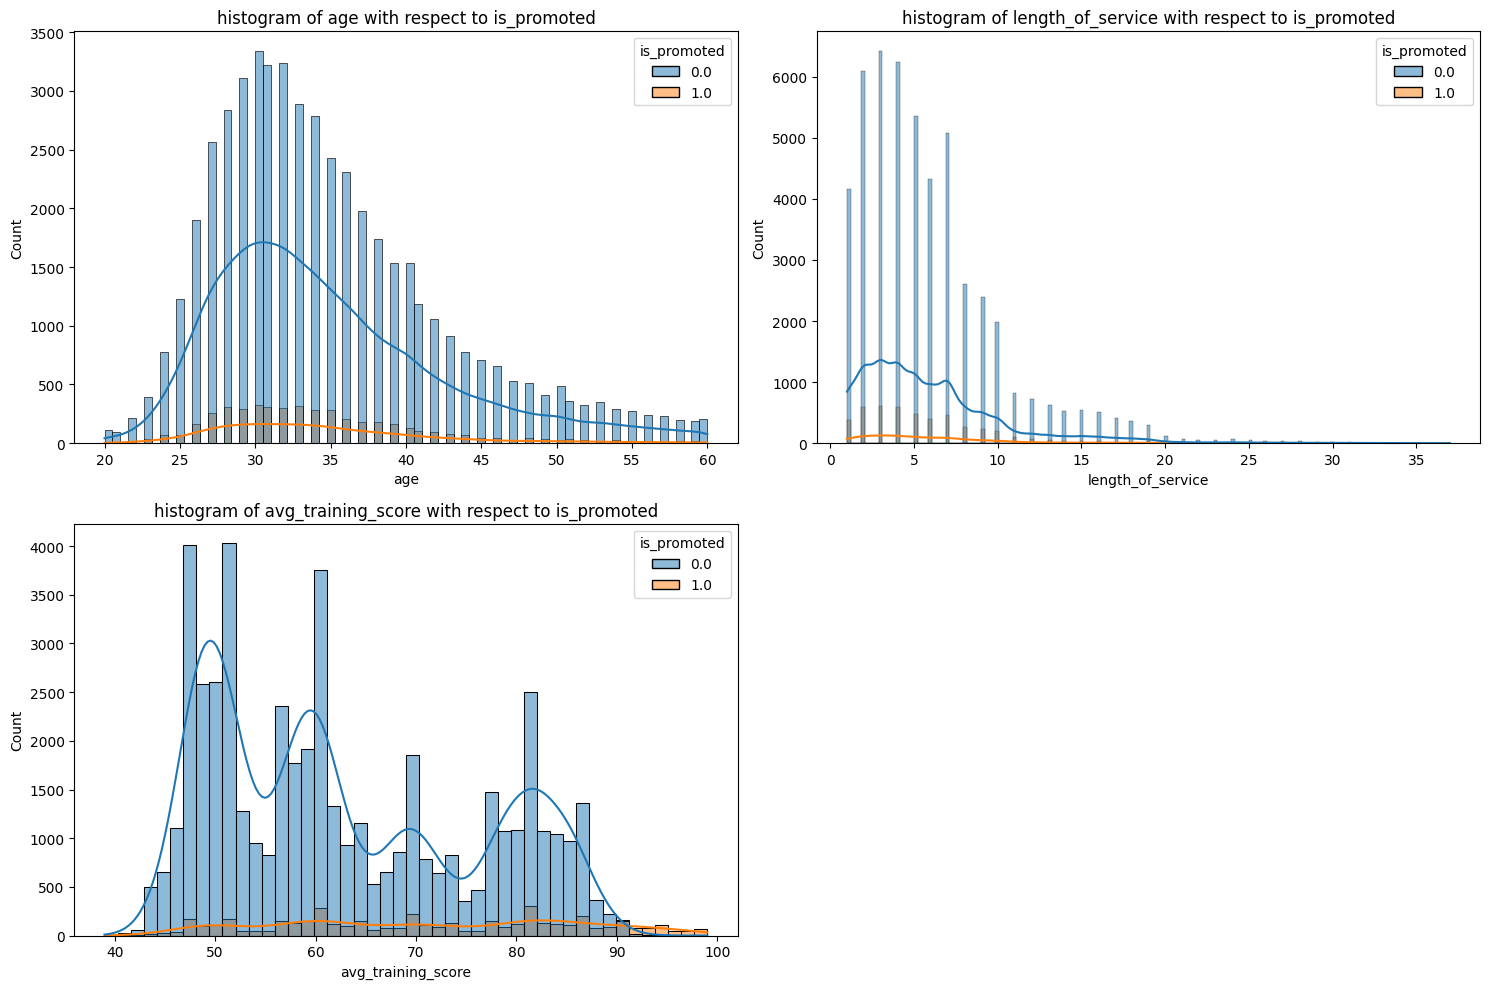

In [134]:
# analysying the continous column with promoted
### histogram of the ['age','length_of_service','avg_training_score']
plt.figure(figsize=(15,10))
for i,col in enumerate(cols,1):
    plt.subplot((len(cols)+2)//2,2,i)
    sns.histplot(x=col,kde=True,hue='is_promoted',data=train_test_df)
    plt.title(f'histogram of {col} with respect to is_promoted')
plt.tight_layout()
plt.show()

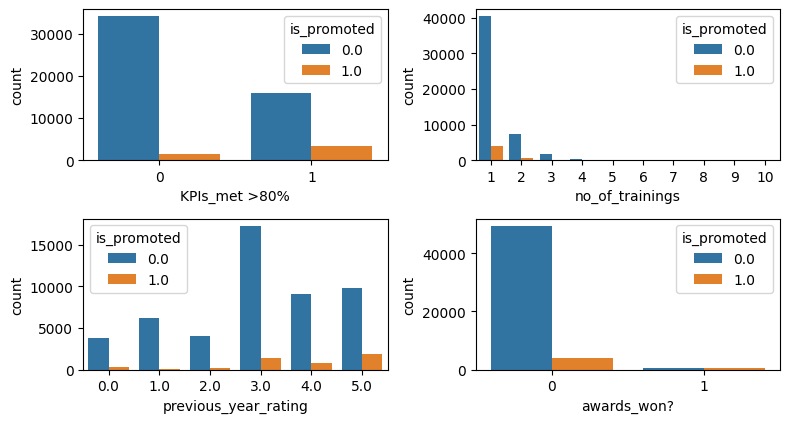

In [135]:
# countplot of columns ['KPIs_met >80%', 'is_promoted', 'no_of_trainings', 'previous_year_rating', 'awards_won?'] with is_promoted
cols__=['KPIs_met >80%', 'no_of_trainings', 'previous_year_rating', 'awards_won?']
plt.figure(figsize=(8,6))
for i,col in enumerate(cols__,1):
    plt.subplot((len(cols__)+2)//2,2,i)
    sns.countplot(x=col,hue='is_promoted',data=train_test_df)
plt.tight_layout()
plt.show()

###### KPI_met
- where the KPI is more than 80% they are mostly like to promote
- it says wher more KPI then get promot
###### no-of-trainings
- here the chart shows the one time trainers are most promoted
###### previous year rating
- here the employees has 3,4 or 5 got promoted more than other rating
###### awards won
- interestingly, while most promoted employees did not win any awards, those who did win awards were almost always promoted.
- This suggests that awards are a strong indicator of promotion, even if they are rare.

# Label Encoding and saving label endcoder

In [136]:
object_columns = ["department", "education", "gender",'recruitment_channel']
# encoders = {}

# for col in object_columns:
#     le = LabelEncoder()
    
#     le.fit(train_test_df[col])
#     encoders[col] = le
#     train_test_df[col] = le.transform(train_test_df[col])

# # Save encoders
# with open("models/label_encoders.pkl", "wb") as f:
#     pickle.dump(encoders, f)

In [137]:
#Ordinal encoding
object_columns = ["department", "education", "gender","recruitment_channel"]
from sklearn.preprocessing import OrdinalEncoder
ordinalencoder=OrdinalEncoder()
ordinalencoder.fit(train_test_df[object_columns])
train_test_df[object_columns] = ordinalencoder.transform(train_test_df[object_columns])
# save encoders
joblib.dump(ordinalencoder,'models/ordinalencoder.pkl')

['models/ordinalencoder.pkl']

In [138]:
# seperating test_df and train_df
# train_df_updated for using model traing 
train_df_updated=train_test_df.iloc[:len(train_df)]

# test_df_updated using for predicton (submission data)
test_df_updated=train_test_df.iloc[len(train_df):]

In [139]:
train_df['is_promoted'].value_counts(normalize=True)

is_promoted
0    0.91483
1    0.08517
Name: proportion, dtype: float64

- the given data has imbalanced 91.4% has Not promoted and 8.5 has promoted data

# correlation

In [140]:
#corr
corr=train_df_updated.corr()
corr

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
department,1.000000,0.043441,-0.030108,0.004732,0.014152,0.079162,-0.100340,0.059060,-0.088209,-0.002151,-0.251626,0.000130
education,0.043441,1.000000,-0.032368,-0.003564,-0.033469,0.339966,0.092379,0.233666,0.012123,-0.001409,0.032787,0.029257
gender,-0.030108,-0.032368,1.000000,0.006567,0.084501,-0.016293,-0.025053,-0.019675,-0.037400,0.002381,-0.024494,-0.011109
recruitment_channel,0.004732,-0.003564,0.006567,1.000000,-0.010405,-0.011400,0.003506,-0.002887,-0.000297,-0.005510,-0.002416,0.002229
no_of_trainings,0.014152,-0.033469,0.084501,-0.010405,1.000000,-0.081278,-0.064119,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.079162,0.339966,-0.016293,-0.011400,-0.081278,1.000000,0.177935,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.100340,0.092379,-0.025053,0.003506,-0.064119,0.177935,1.000000,0.191163,0.274593,0.021475,0.058718,0.125991
length_of_service,0.059060,0.233666,-0.019675,-0.002887,-0.057275,0.657111,0.191163,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.088209,0.012123,-0.037400,-0.000297,-0.045576,-0.025592,0.274593,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,-0.002151,-0.001409,0.002381,-0.005510,-0.007628,-0.008169,0.021475,-0.039927,0.097000,1.000000,0.072138,0.195871


<Axes: >

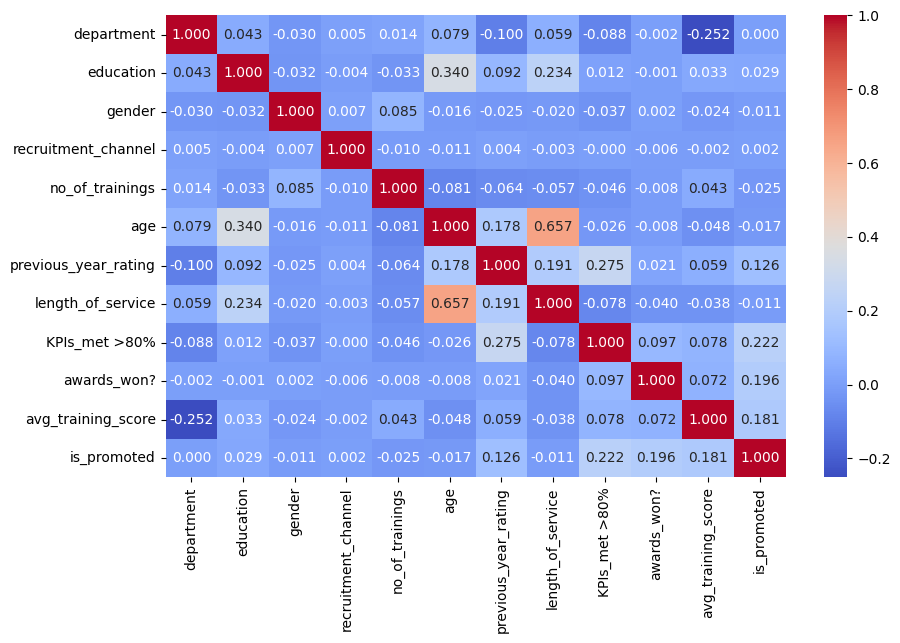

In [141]:
# Heatmap for the correaltion
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.3f')

##### correlation
here the correlation value upto 3 decimal points
- 1.'KPI's>80% has' better correlation which is 0.222
- 2.'award_won' also show's significant  correlation whic is 0.181
- 3.'avg_traing_score' has moderate correlation  181
- 4.'previous_year_rating' shows some infulence 126
- 5.department have not correlation which is 0.00013
- remain are have correlation but less

# spliting train and test data

In [142]:
# input values are features 
features=train_df_updated.drop('is_promoted',axis=1)

# output values are called target values
target=train_df_updated['is_promoted']

In [143]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42,shuffle=True,stratify=target)

splitting data into train and test 
- Train data :80% 
- Test data :20%
- random_state=42 random 42 value selection
- Ensures equal ratio of target classes in train & test

In [144]:
# Checking the shape of training and testing datasets for features and target variables
print(f'shape of the input x-train :{x_train.shape} \nshape Resampling Imbalanced Data of the input x-test :{x_test.shape} \nshape of the output y-train :{y_train.shape} \nshape of the output y-test :{y_test.shape}')

shape of the input x-train :(43846, 11) 
shape Resampling Imbalanced Data of the input x-test :(10962, 11) 
shape of the output y-train :(43846,) 
shape of the output y-test :(10962,)


### Resampling  Imbalanced data

In [145]:
sm=SMOTE(sampling_strategy=0.3,random_state=52)

In [146]:
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

In [147]:
# Checking the shape of training and testing datasets for features and target variables
print(f'shape of the input x-train :{x_train_res.shape} \nshape of the output y-train :{y_train_res.shape}')

shape of the input x-train :(52145, 11) 
shape of the output y-train :(52145,)


### scaling  and  saving scaler as pickle

In [148]:
scaler=MinMaxScaler()
x_train_res_scaled=scaler.fit_transform(x_train_res)
x_test_scaled=scaler.transform(x_test)
joblib.dump(scaler, "models/minmax_scaler.pkl")


['models/minmax_scaler.pkl']

- scaling the x_train and x_test the values lies in between 0 to 1 after scale

In [149]:
models={
    'logistic regression':LogisticRegression(),
    'neighbors':KNeighborsClassifier(n_neighbors=7),
    'decision tree':DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=55),
    'random forest':RandomForestClassifier(n_estimators=50,max_depth=10,random_state=55),
    'gradient boosting':GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,max_depth=10,random_state=32),
    'ada boosting':AdaBoostClassifier(n_estimators=50, learning_rate=1.0),
    'bagging':BaggingClassifier(n_estimators=20, random_state=42)
}

### Model Training and evaluating

In [150]:
# function for model training 
def model_training(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    score=accuracy_score(y_test,ypred)
    y_train_predict=model.predict(x_train)
    train_score=accuracy_score(y_train,y_train_predict)
    score=np.round(score,5)
    return model,score,train_score

In [151]:
score={}
model_trained_list={}
for name,model in models.items():
    print(f'{name} :')
    model_trained,score_,train_score=model_training(model,x_train_res_scaled,x_test_scaled,y_train_res,y_test)
    model_trained_list[name]=model_trained
    score[name]=score_
    print('Accuracy Score :',score_)
    print('train score :',train_score)
    print(50*'-')
    print(50*'-')

logistic regression :
Accuracy Score : 0.88287
train score : 0.777792693450954
--------------------------------------------------
--------------------------------------------------
neighbors :
Accuracy Score : 0.89792
train score : 0.9105954549813021
--------------------------------------------------
--------------------------------------------------
decision tree :
Accuracy Score : 0.91863
train score : 0.8985521142966727
--------------------------------------------------
--------------------------------------------------
random forest :
Accuracy Score : 0.92894
train score : 0.8969795761818008
--------------------------------------------------
--------------------------------------------------
gradient boosting :
Accuracy Score : 0.93806
train score : 0.9450186978617318
--------------------------------------------------
--------------------------------------------------
ada boosting :
Accuracy Score : 0.89664
train score : 0.850397928852239
-------------------------------------------

### creating DataFrame for model and its score

In [152]:
score_df=pd.DataFrame(list(score.items()),columns=['Model','Accuracy_score'])

In [153]:
score_df=score_df.sort_values(by='Accuracy_score',ascending=False).reset_index(drop=True)

In [154]:
score_df

,Model,Accuracy_score
0,gradient boosting,0.93806
1,random forest,0.92894
2,bagging,0.92136
3,decision tree,0.91863
4,neighbors,0.89792
5,ada boosting,0.89664
6,logistic regression,0.88287


# ROC Curve

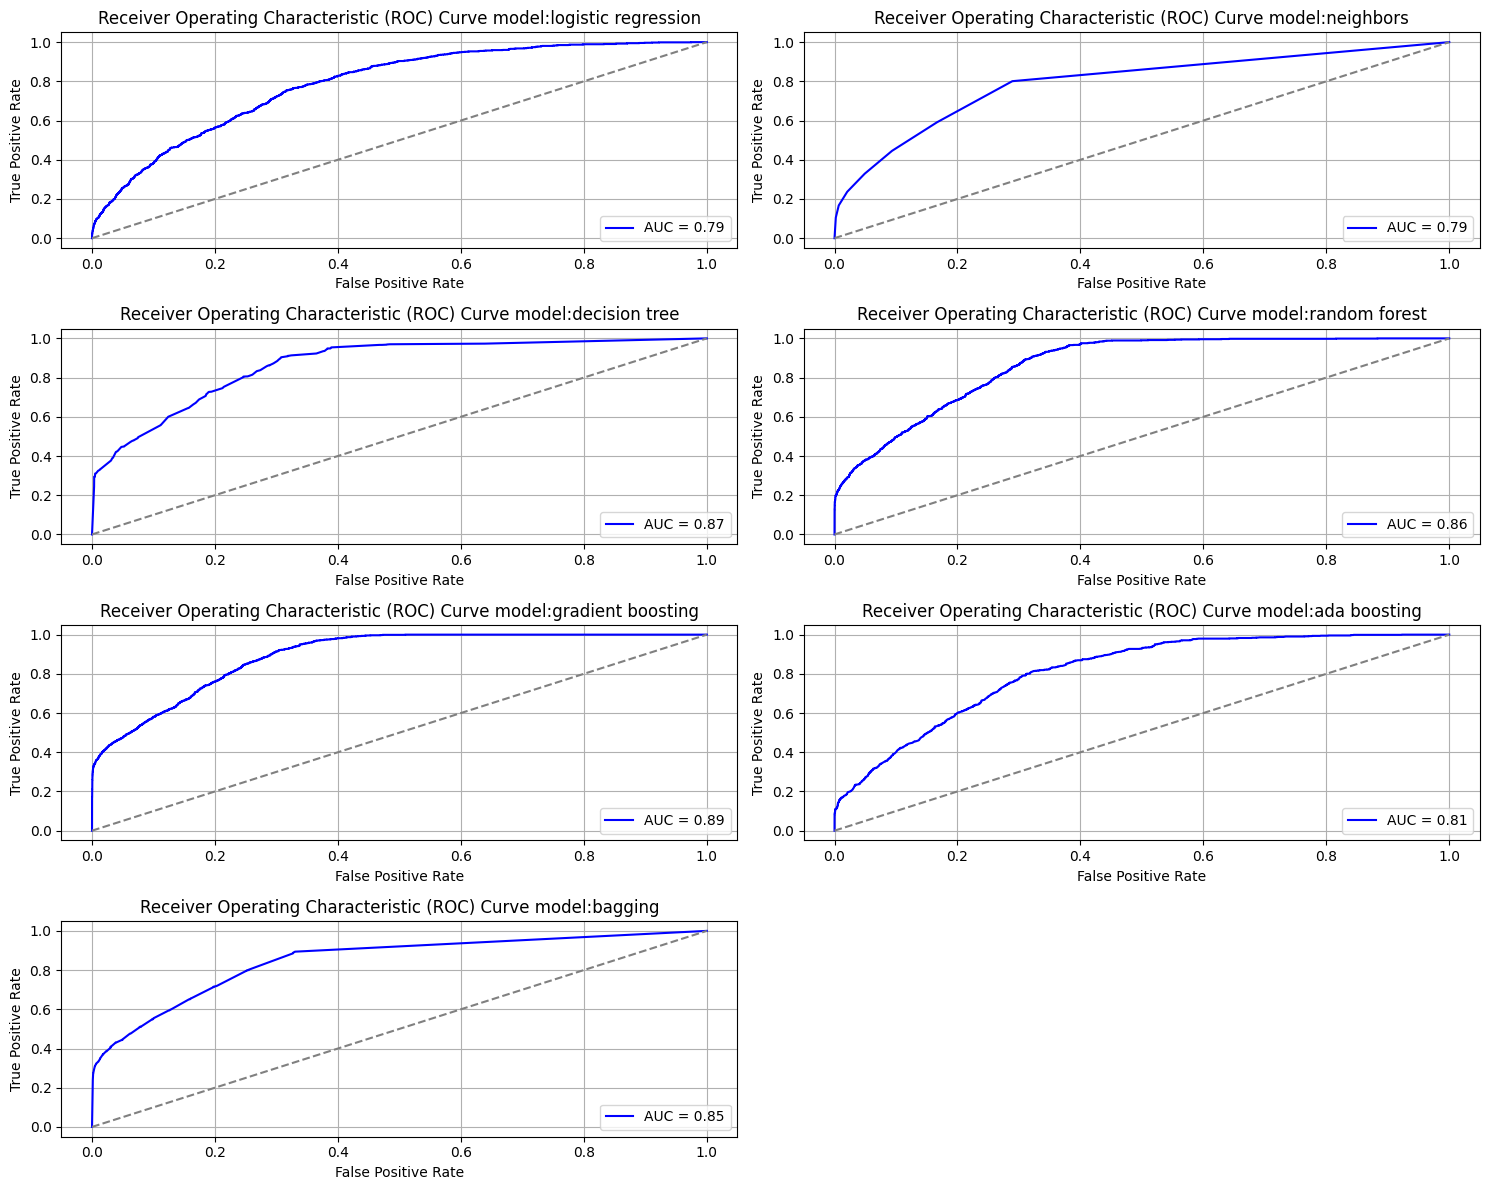

In [155]:
plt.figure(figsize=(15,12))
for i, (name, model) in enumerate(model_trained_list.items(), 1):
    model.fit(x_train_res_scaled, y_train_res)
    
    # Get predicted probabilities
    y_prob = model.predict_proba(x_test_scaled)[:, 1]
    
    # Get FPR, TPR
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC in subplots
    plt.subplot((len(model_trained_list) + 1) // 2, 2, i)
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve model:{name}')
    plt.legend(loc='lower right')
    plt.grid()
plt.tight_layout()
plt.show()

- The Best ROC curve has for the model 'Gradient Boosting', 'random forest' and 'decision tree'

## Saving Best Model

In [156]:
#best model 
best_model=model_trained_list[score_df['Model'].iloc[0]]
best_model
#saving model
joblib.dump(best_model,'models/model.h5')

['models/model.h5']

In [184]:
train_predict=best_model.predict(x_train_res_scaled)

In [194]:
x_train_res

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,4.000000,0.000000,0.0,2.000000,1,54,3.000000,19,0,0,62
1,5.000000,2.000000,0.0,2.000000,1,39,5.000000,10,1,0,70
2,5.000000,0.000000,0.0,0.000000,1,36,3.000000,4,1,0,72
3,7.000000,2.000000,1.0,0.000000,1,40,3.000000,2,0,0,51
4,8.000000,2.000000,1.0,0.000000,2,41,3.000000,5,0,0,82
...,...,...,...,...,...,...,...,...,...,...,...
52140,7.000000,0.000000,1.0,0.465726,1,28,4.465726,3,0,0,58
52141,7.000000,0.765318,1.0,0.000000,1,39,3.765318,10,0,0,61
52142,8.000000,2.000000,1.0,1.139949,1,53,2.000000,16,0,0,89
52143,5.582457,0.000000,1.0,0.000000,1,29,4.417543,4,0,0,84


In [206]:
train_predict

array([0., 0., 0., ..., 1., 1., 1.])

In [211]:
train_df.loc[52141]

employee_id                       61911
department                   Technology
region                         region_2
education               Below Secondary
gender                                m
recruitment_channel            sourcing
no_of_trainings                       1
age                                  23
previous_year_rating                4.0
length_of_service                     1
KPIs_met >80%                         1
awards_won?                           0
avg_training_score                   82
is_promoted                           1
Name: 52141, dtype: object

In [210]:
train_df_updated.iloc[52141]

department               8.0
education                1.0
gender                   1.0
recruitment_channel      2.0
no_of_trainings          1.0
age                     23.0
previous_year_rating     4.0
length_of_service        1.0
KPIs_met >80%            1.0
awards_won?              0.0
avg_training_score      82.0
is_promoted              1.0
Name: 52141, dtype: float64

# submission data

In [157]:
submission_data=test_df_updated.drop(['is_promoted'],axis=1)

In [158]:
submission_data.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8.0,0.0,1.0,2.0,1,24,0.0,1,1,0,77
1,2.0,0.0,0.0,0.0,1,31,3.0,5,0,0,51
2,7.0,0.0,1.0,0.0,1,31,1.0,4,0,0,47
3,5.0,0.0,0.0,0.0,3,31,2.0,9,0,0,65
4,1.0,0.0,1.0,2.0,1,30,4.0,7,0,0,61


## scaling submission data

In [159]:
submission_data_scaled=scaler.transform(submission_data)

In [160]:
submission_data_scaled[2]

array([0.875     , 0.        , 1.        , 0.        , 0.        ,
       0.275     , 0.2       , 0.09090909, 0.        , 0.        ,
       0.13333333])

In [161]:
output=best_model.predict(submission_data_scaled)

In [162]:
submission_df = pd.DataFrame({
    'employee_id': test_df['employee_id'].values,
    'is_promoted': output.astype(int).flatten()
})

### saving output of submission data in csv format

In [163]:
submission_df.to_csv('sample_submission.csv',index=False)

In [176]:
sub=pd.read_csv(r'sample_submission.csv')

In [177]:
sub.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


# Cross Validation

In [164]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=32)

### all models cross validation

In [165]:
# for all models
for name,model in models.items():
    cross_score=cross_validate(model,features,target,cv=cv)
    print(f" average score of model {name} :{cross_score['test_score'].mean()*100:.2f}")

 average score of model logistic regression :91.41
 average score of model neighbors :92.91
 average score of model decision tree :93.48
 average score of model random forest :92.79
 average score of model gradient boosting :93.91
 average score of model ada boosting :92.30
 average score of model bagging :93.16
